## Studies into Music: Song Features

Songs are made both of music and lyrics, my plan is to run both studies. First, in part I focusing on the song features and part II exploring the lyrics. Lastly, a comparative study to see which is most likely to be a better predictive model for mood (happy, sad, angry, relaxed).

<ul class="toc-item"><li><span><a href="#Descriptive-Statistical-Analysis" data-toc-modified-id="Descriptive-Statistical-Analysis"><span class="toc-item-num">1&nbsp;&nbsp;</span>Descriptive Statistical Analysis<a class="anchor" id="description"></a></a></span><ul class="toc-item"><li><span><a href="#Gathering-the-data" data-toc-modified-id="Gathering-the-data"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Gathering my data (testing dataset)<a class="anchor" id="gathering"></a></a></span><ul class="toc-item"><li><span><a href="#Visualizing-the-data" data-toc-modified-id="Visualizing-the-data"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Visualizing the data: bar and line plot<a class="anchor" id="featuresplot"><li><span><a href="#What-are-these-features?" data-toc-modified-id="What-are-these-features?-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>What are these features?</a></span></li><li><span><a href="#What-do-they-mean-in-my-results? " data-toc-modified-id="What-do-they-mean-in-my-results? "><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span> What do they mean in my results?<a class="anchor" id="myfeatures"></a></a></span></li></ul><li><span><a href="#Gathering-a-new-dataset-(training-dataset):" data-toc-modified-id="Gathering-a-new-dataset"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gathering a new dataset (training dataset)<a class="anchor" id="trainingdataset"></a></a></span><ul class="toc-item"><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Feature Engineering<a class="anchor" id="featuresplot"><li><span><a href="#Handling-the-skewness-of-the-features" data-toc-modified-id="Handling-the-skewness-of-the-features"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Handling the skewness of the features<a class="anchor" id="featuresplot"></ul></li></ul></li><li><span><a href="#Creating-a-Predictive-Algorithm" data-toc-modified-id="Creating-a-Predictive-Algorithm"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creating a Predictive Algorithm<a class="anchor" id="description"></a></a></span><ul class="toc-item"><li><span><a href="#Imbalance-problem" data-toc-modified-id="Imbalance-problem"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Imbalance problem<li><span><a href="#Training-Machine-Learning-Models" data-toc-modified-id="What-are-these-features?-1.1.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Training Machine Learning Models</a></span></li><ul class="toc-item"><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Logistic Regression<li><span><a href="#Decision-trees" data-toc-modified-id="Decision-trees"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Decision trees<li><span><a href="#Random-forest-classifier" data-toc-modified-id="Random-forest-classifier"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Random forest classifier</ul></li></ul></ul></li><li><span><a href="#Evaluating-the-Model" data-toc-modified-id="Evaluating-the-Model"><span class="toc-item-num">3&nbsp;&nbsp;</span>Evaluating the Model<a class="anchor" id="evaluating"></a></a></span><ul class="toc-item"><li><span><a href="#Test-Data" data-toc-modified-id="Test-Data"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Test Data<li><span><a href="#Results" data-toc-modified-id="Results"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Results</a></span></li><ul class="toc-item"><ul class="toc-item"><li><span><a href="#Logistic-Regression-Results" data-toc-modified-id="Logistic-Regression-Results"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Logistic Regression Results</a></span><li><span><a href="#Decision-Tree-Results" data-toc-modified-id="Decision-Tree-Results"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Decision trees Results</a></span><li><span><a href="#Random-Forest-Results" data-toc-modified-id="Random-Forest-Results"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Random Forest Results</a></span><span></ul></li></ul></ul><li><span><a href="#Testing-dataset-(my-Song-features)" data-toc-modified-id="Testing-dataset-(my-Song-features)"><span class="toc-item-num">4&nbsp;&nbsp;</span>Testing dataset (my Song features)</a></li></ul>

# Descriptive Statistical Analysis<a class="anchor" id="description"></a>

## Gathering the data<a class="anchor" id="gathering"></a>

In [46]:
import pandas as pd
import numpy as np
import spotipy as sp
import spotipy.util as util
import simplejson as json
import csv
from ast import literal_eval

import math
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as snb

%matplotlib inline

In [1]:
username='112896040'
scope='user-top-read'
token = util.prompt_for_user_token(username,scope,client_id='8d9e21df6c4d41539613ce0a16f87c63',client_secret='7fbf69bc60074033be6d0e34bf11b464',redirect_uri='http://localhost:8888/notebooks/data.ipynb')

if token:
    sp = spotipy.Spotify(auth=token)
    sp.trace = False
    ranges = ['short_term']
    petitChart = {}
    songNames = []
    songArtists = []
    ids = []
    for rangeTerm in ranges:
        results = sp.current_user_top_tracks(time_range=rangeTerm, limit=50)
        for i, item in enumerate(results['items']):
            ids.append(item['id'])
            songNames.append(item['name'])
            songArtists.append(item['artists'][0]['name'])
            #print (i, item['name'], '//', item['artists'][0]['name'])
        #print

    petitChart['items']= [{'id': ids, 'songNames' : songNames, 'songArtists': songArtists}]
    
else:
    print("Can't get token for", username)
    
mySongs = pd.DataFrame(petitChart['items'][0])
mySongs[['songNames','songArtists']]

,songNames,songArtists
0,Dance Monkey,Tones and I
1,Enola Gay - Remastered,Orchestral Manoeuvres In The Dark
2,waves - Tame Impala Remix,Miguel
3,Audacity Of Huge,Simian Mobile Disco
4,Birthday Cake,Rihanna
5,Dani California,Red Hot Chili Peppers
6,Sweetness,Jimmy Eat World
7,Supersonic - Remastered,Oasis
8,Fell In Love With a Girl,The White Stripes
9,Forever,Drake


Now I'm going to grab the SongIds to get their features from the Spotify API

In [51]:
mySongs = pd.DataFrame(petitChart['items'][0])
idListMySongs = mySongs['id']
mySongfeatures = sp.audio_features(idListMySongs)

In [378]:
dfmySongFeats = pd.read_csv('mySongFeatures.csv')
dfmySongFeats = pd.DataFrame(mySongfeatures)
dfmySongFeats

#Erasing non important features
dfmySongFeatsClean = dfmySongFeats.drop(['type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'], axis=1)
dfmySongFeatsClean

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id
0,0.824,0.588,6,-6.400,0,0.0924,0.692000,0.000104,0.1490,0.513,98.027,5ZULALImTm80tzUbYQYM9d
1,0.559,0.764,2,-7.058,0,0.0348,0.004410,0.029900,0.0807,0.932,143.319,3NYCaxkggl0Hh8vQptSUvV
2,0.529,0.894,2,-3.599,1,0.0412,0.308000,0.000005,0.2540,0.543,108.024,3lB0GMiI5KxDbTOG8V3bOx
3,0.772,0.686,8,-7.946,1,0.0560,0.000062,0.007790,0.0674,0.687,126.937,72IyavGtVbOMHkP5mYTBPA
4,0.702,0.826,3,-6.498,1,0.0529,0.320000,0.000227,0.3550,0.329,80.014,4EfN6bixdOOgoLYR5C4cWo
5,0.556,0.913,0,-2.360,1,0.0437,0.019300,0.000009,0.3460,0.730,96.184,10Nmj3JCNoMeBQ87uw5j8k
6,0.487,0.898,5,-4.436,1,0.0380,0.003050,0.000000,0.2600,0.597,135.331,429IbFR4yp2J81CeTwF5iY
7,0.362,0.910,9,-2.863,1,0.0407,0.000063,0.012300,0.0933,0.597,104.043,1ZAWaJppxtA3zPh1R2W2wS
8,0.144,0.978,0,-1.644,1,0.1980,0.673000,0.000138,0.8160,0.361,191.772,1yjr0GeoqGPejLg5P9g8Qe
9,0.457,0.906,5,-2.278,0,0.3420,0.249000,0.000000,0.1820,0.540,104.020,5UsLjwBaTHBX4ektWIr4XX


### Visualizing the data<a class="anchor" id="featuresplot"></a>
Combination bar and line plot. Let's see the features of my most recent songs in a more graphic way.

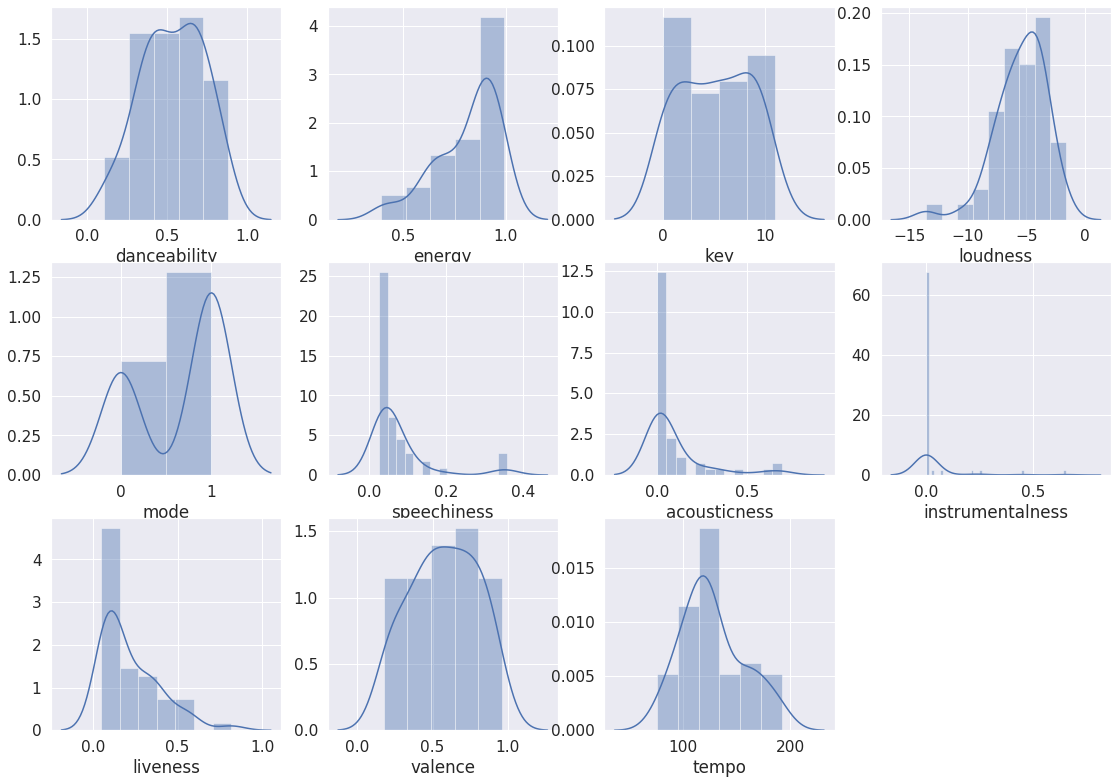

In [391]:
columnNumber = 5
data_columns = dfmySongFeatsClean._get_numeric_data().columns.values
plot_columns = columnNumber
number_of_columns = math.ceil(len(data_columns)/plot_columns)
number_of_rows = math.ceil((len(data_columns))/number_of_columns)

plt.figure(figsize=(19, 18))
    
for i in range(0, len(data_columns)):
    plt.subplot(number_of_columns + 1, number_of_rows, i+1)
    snb.distplot(dfmySongFeatsClean[data_columns[i]], kde=True) 

In [392]:
dfmySongFeatsClean.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,50.0,0.535380,0.196675,0.107000,0.385750,0.536500,0.675500,0.882
energy,50.0,0.812420,0.155712,0.395000,0.697750,0.873000,0.919000,0.993
key,50.0,5.120000,3.526228,0.000000,2.000000,5.000000,8.750000,11.000
loudness,50.0,-5.472360,2.200573,-13.580000,-6.590250,-5.182500,-3.909500,-1.644
mode,50.0,0.640000,0.484873,0.000000,0.000000,1.000000,1.000000,1.000
speechiness,50.0,0.075460,0.078213,0.026700,0.037775,0.044350,0.079175,0.357
acousticness,50.0,0.094689,0.172036,0.000009,0.000499,0.013900,0.100600,0.692
instrumentalness,50.0,0.035149,0.118314,0.000000,0.000008,0.000208,0.004780,0.653
liveness,50.0,0.221008,0.172877,0.048700,0.090150,0.148000,0.316500,0.816
valence,50.0,0.574520,0.224034,0.175000,0.417250,0.594000,0.761000,0.961


Finally merge both mySongs dataFrame and the features dataFrame

In [393]:
mySongsFeaturesFinalDF = pd.merge(left=dfmySongFeatsClean,right=mySongs)
mySongsFeaturesFinalDF

,Artist,Title,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Tones and I,Dance Monkey,5ZULALImTm80tzUbYQYM9d,0.824,0.588,6,-6.400,0,0.0924,0.692000,0.000104,0.1490,0.513,98.027
1,Simian Mobile Disco,Audacity Of Huge,72IyavGtVbOMHkP5mYTBPA,0.772,0.686,8,-7.946,1,0.0560,0.000062,0.007790,0.0674,0.687,126.937
2,Red Hot Chili Peppers,Dani California,10Nmj3JCNoMeBQ87uw5j8k,0.556,0.913,0,-2.360,1,0.0437,0.019300,0.000009,0.3460,0.730,96.184
3,Daft Punk,Instant Crush,2cGxRwrMyEAp8dEbuZaVv6,0.775,0.585,10,-9.516,0,0.0271,0.042200,0.619000,0.0770,0.518,109.942
4,Miguel,waves - Tame Impala Remix,3lB0GMiI5KxDbTOG8V3bOx,0.529,0.894,2,-3.599,1,0.0412,0.308000,0.000005,0.2540,0.543,108.024
5,Irene Cara,Fame,5CI1FP2Volc9wjz2MBZsGx,0.700,0.730,0,-8.763,0,0.0311,0.132000,0.000000,0.1330,0.961,130.519
6,Laura Branigan,Self Control,6JNJERZGJwDVgkmbohBw7u,0.814,0.686,6,-12.172,0,0.0342,0.219000,0.003860,0.1550,0.779,106.680
7,The White Stripes,Fell In Love With a Girl,1yjr0GeoqGPejLg5P9g8Qe,0.144,0.978,0,-1.644,1,0.1980,0.673000,0.000138,0.8160,0.361,191.772
8,Irene Cara,What A Feeling,0aAR5HogGoT68EWFbyRFqx,0.532,0.729,10,-6.840,1,0.0474,0.382000,0.000000,0.3660,0.595,121.970
9,Portugal. The Man,Purple Yellow Red and Blue - Passion Pit Remix,6DmH78dLKsieqZFhmiQ9ok,0.663,0.813,4,-5.094,0,0.0342,0.000215,0.000266,0.0551,0.702,114.993


### What are these features?<a class="anchor" id="featuresdescription"></a>

These are the features as described by the documentation:

1. Danceability: How suitable is a song for dancing? This feature is a combination of other elements like tempo and beat strength. A value of 0.0 is least danceable and 1.0 is most danceable.
2. Energy: How intense is a song? (metal is likely to have high energy and classical likely to have low energy) Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
3. **Key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.**
4. Loudness: How loud is a song? Values typical range between -60 and 0 db. 
5. **Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.**
6. Speechiness: Is there a lot of spoken word? (rap music is likely to have a higher speechiness). The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
7. Acousticness: How acoustic is a song? A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
8. Instrumentalness: How instrumental is this song? The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
9. Liveness: Is there an audience in the track? Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.A value above 0.8 provides strong likelihood that the track is live
10. Valence: describes the positiveness of a track (tracks with high valence sound happy, and those with low valence sound sad). 0.0 to 1.0 describing the musical positiveness 1, happiest
11. Tempo: overall estimated pace of the track in beats per minute (BPM). The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

### What do they mean in my results?<a class="anchor" id="myfeatures"></a>

Let's explore my results then.
Seems that  **danceability** and **energy** are negatively skewed in my songs, as well as **loudness**.

Not many of my recently played tracks have much **speechiness**, I guess I haven't listen to Logic in a while. Same things goes for **liveness, acousticness and instrumentalness** shows me that I don't really listen to acoustic music, music without lyrics or recorded in a live setting.

Looking into **tempo**, it seems to be slightly negatively skewed but mostly peaking at 120BPM which as a fun fact is known as running BPM and among the ones you want to use to do CPR.

Finally, **valence** seems to be the most normally distributed feature of them all, indicating that I don't seem to mind the musical positiveness of a song as long as it's energetic and upbeat so much so that you can dance to it. This result makes complete sense to me as I look for a 'keep me going' effect whenever I listen to music.

However, my ultimate goal is to use my song dataset with another larger dataset of songs and use them as a training and testing dataset using machine learning. My dataset is the testing dataset.

## Gathering a new dataset (training dataset):<a class="anchor" id="trainingdataset"></a>

I have used the "MoodyLyrics: A Sentiment Annotated Lyrics" (*) dataset because it already has a study attached to it that that has catalogued moods according to the "content words of lyrics and their valence and arousal norms in affect lexicons". I thought it was a great dataset to use if my ultimate goal is to compare both song features and lyrics.

I started off with their balanced dataset, which has the same amount of songs for each of the four moods. The original dataset contains 2000 songs, however not all of them at in Spotify's catalogue of songs to obtain their features. The next code lines are how I obtained the song features and deleted from the dataset the songs the ones that were not found in Spotify. I also kept a record of the excluded ones to keep track of which moods would be unbalance after this step. I ended with a dataset of 1929 songs to use as a training dataset.

(*)- Çano, E.; Morisio, M., MoodyLyrics: A Sentiment Annotated Lyrics Dataset, 
ACM, Proceedings of International Conference on Intelligent Systems, Metaheuristics 
& Swarm Intelligence, ISMSI2017, pp. 118-124, Hong Kong, March 2017, 
doi:10.1145/3059336.3059340. 


In [ ]:
#Read the excel and using Pandas turn it into a dataFrame.
moodySongs = pd.read_excel('ml_balanced_lymood.xlsx')
cleanMoody = moodySongs

#Spotipy needs songIDs to be able to get song Features, so I used the values in the
#Artist and Title columns to get those songIDs. If I couldn't find the songID
#it means that it needs to be removed from the dataset and saved in my noSongID list.
moodySongIds = []
noSongIds = []
for i, song in moodySongs.iterrows():
    print(i, moodySongs['Artist'][i],' ',moodySongs['Title'][i])
    result = sp.search(moodySongs['Artist'][i]+" "+moodySongs['Title'][i], limit=1, type='track')
    if len(result['tracks']['items']) == 0:
        noSongIds.append(moodySongs['Artist'][i]+" "+ moodySongs['Title'][i])
        cleanMoody = cleanMoody.drop([i],axis=0)
    else:
        moodySongIds.append(result['tracks']['items'][0]['id'])
        
dfmoodIds = pd.DataFrame(moodySongIds)

#Unfortunately, Spotify's endpoint only allows 50 songs at a time to be requested
#so I created this loop to go through the Moody dataset songIDs dataFrame 
moodyFeatures = []
maxSongs = []

for i, ids in dfmoodIds.iterrows():
    if len(maxSongs) < 50:
        if (i > 1900 and len(maxSongs) == 29):
            maxSongs.append(moodySongIds[i])
            moodyFeatures.append(sp.audio_features(maxSongs))
        else:
            maxSongs.append(moodySongIds[i])        
    else:
        moodyFeatures.append(sp.audio_features(maxSongs))
        maxSongs = []
        maxSongs.append(moodySongIds[i])

#Finally bring it all chunks of 50 song features at a time into one ordered dataFrame
#and join the dataFrames in variable resultFeatures
frames = []
for i in range(len(moodyFeatures)):
    for j in range(len(moodyFeatures[i])):
        #we check if there's NaN, if not we proceed
        #I can also check before with moodyFeatures.isnull().sum()
        if (moodyFeatures[i][j] == moodyFeatures[i][j]):
            intodict = literal_eval(moodyFeatures[i][j])
            mod = pd.DataFrame(intodict, index=[j])
            frames.append(mod)

resultFeatures = pd.concat(frames)

#Finally I merge the dataFrames of song & songTitles and their corresponding features
#using Pandas merge
resultFeatures = resultFeatures.drop_duplicates()
moodyFeaturesFinalDF = pd.merge(left=cleanMoody,right=resultFeatures, on=['id'])

### Feature Engineering<a class="anchor" id="featurenengineering"></a>

Similar to what was done in the study by the Moody dataset creators, I'm going to use two variables to create a new variable, which I'm calling arousal. based on what these values mean let's assign some moods to these numbers:

* happy = 0    
* angry = 1
* relaxed = 2
* sad = 3   

From all of the features that Spotify's API gives us, I'm going to use:

* Danceability: How suitable is a song for dancing? This feature is a combination of other elements like tempo and beat strength. A value of 0.0 is least danceable and 1.0 is most danceable.
* Energy: How intense is a song? (metal is likely to have high energy and classical likely to have low energy) Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

* Valence: describes the positiveness of a track (tracks with high valence sound happy, and those with low valence sound sad). 0.0 to 1.0 describing the musical positiveness 1, happiest


(Music theory and composition tells us that Key and Mode should be investigated too when it comes to moods, but maybe in another study :).

Now, I already did all of that and saved it as a CSV. So I'll load my info from there. I'll exclude columns I don't want:

In [395]:
moodyFeaturesFinal = pd.read_csv('moodyFeaturesFinal.csv')
moodyFeaturesFinal = moodyFeaturesFinal.loc[:, ~moodyFeaturesFinal.columns.isin(['key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','tempo'])]
moodyFeaturesFinal

,Artist,Title,LyricsMood,id,danceability,energy,valence
0,Usher,There Goes My Baby,relaxed,6IUiqtI8tE49sqGbmtrNd8,0.626,0.520,0.257
1,Beenie Man,Slam,relaxed,3oBTK8oXmPrDvkAoNQJpna,0.714,0.824,0.753
2,Bad Company,Can't Get Enough,happy,6n5lHdpuBDdA7pYDpiKzEI,0.638,0.686,0.766
3,The Police,So Lonely,sad,6fnj0w9yv1sii23czU1XL1,0.528,0.583,0.727
4,Rockpile,Teacher Teacher,relaxed,1CKXcZvvohEUyKb1uHIKwW,0.450,0.783,0.810
...,...,...,...,...,...,...,...
1924,Mr. Big,Addicted To That Rush,sad,1RCOCHtcnVWoWNSarMlwyd,0.468,0.971,0.457
1925,The Rolling Stones,Hang Fire,angry,5HcTLesmMaPr0CkwdbtK0o,0.461,0.906,0.939
1926,Jack Johnson,From The Clouds,relaxed,2PsuxIafcmuwiGIWJeU3As,0.867,0.492,0.842
1927,Robbie Robertson,He Don't Live Here No More,sad,1fYrWjkCc0UT1PQHy4tXcJ,0.738,0.537,0.625


### Handling the skewness of the features<a class="anchor" id="skewness"></a>

Let's see how well distributed is the dataset in a distribution plot according to the features from spotify:

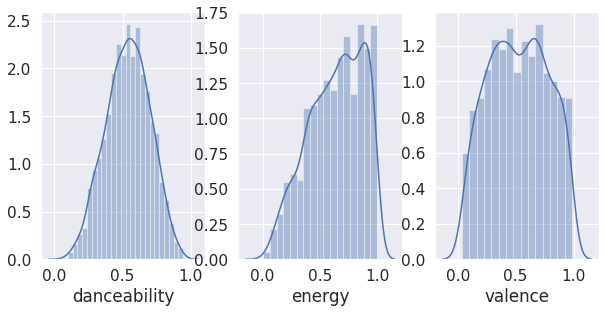

In [396]:
def distributionPlot(data, columnNumber):
    data_columns = data._get_numeric_data().columns.values
    plot_columns = columnNumber
    number_of_columns = math.ceil(len(data_columns)/plot_columns)
    number_of_rows = math.ceil((len(data_columns))/number_of_columns)
    plt.figure(figsize=(10,10))

    # plot distribution
    for i in range(0, len(data_columns)):
        plt.subplot(number_of_columns + 1, number_of_rows, i+1)
        snb.distplot(data[data_columns[i]], kde=True) 
        
distributionPlot(moodyFeaturesFinal, 4)

The 'danceability' feature I'm studying is not *that* far normal distribution, except 'energy' which is negatively skewed. Also, that the balance of moods is biased for 'relaxed' and 'sad' and not as many samples for 'happy' and 'angry. I'm going to apply a **square transformation** to transform the negatively skewed data.

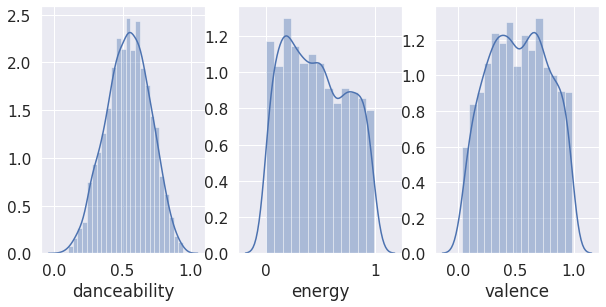

In [397]:
negatively_skewed_cols = ['energy']
for col in moodyFeaturesFinal._get_numeric_data().columns:
    if col in negatively_skewed_cols:
        moodyFeaturesFinal[col] = moodyFeaturesFinal[col].apply(lambda x : (x**2))
        
distributionPlot(moodyFeaturesFinal, 4)

In [399]:
mood = []
moodText = []
for i, song in moodyFeaturesFinal.iterrows():
    arousal = (moodyFeaturesFinal['danceability'][i] * moodyFeaturesFinal['energy'][i])
    if arousal > 0.5 and moodyFeaturesFinal['valence'][i] > 0.5:
        mood.append(0)
        moodText.append("Happy")
    elif arousal > 0.5 and moodyFeaturesFinal['valence'][i] < 0.5:
        mood.append(1)
        moodText.append("Angry")
    elif arousal < 0.5 and moodyFeaturesFinal['valence'][i] > 0.5:
        mood.append(2)
        moodText.append("Relaxed")
    else:
        mood.append(3)
        moodText.append("Sad")

moodyFeaturesFinal['mood'] = mood
moodyFeaturesFinal['FeaturesMood'] = moodText
moodyFeaturesFinal

,Artist,Title,LyricsMood,id,danceability,energy,valence,mood,FeaturesMood
0,Usher,There Goes My Baby,relaxed,6IUiqtI8tE49sqGbmtrNd8,0.626,0.270400,0.257,3,Sad
1,Beenie Man,Slam,relaxed,3oBTK8oXmPrDvkAoNQJpna,0.714,0.678976,0.753,2,Relaxed
2,Bad Company,Can't Get Enough,happy,6n5lHdpuBDdA7pYDpiKzEI,0.638,0.470596,0.766,2,Relaxed
3,The Police,So Lonely,sad,6fnj0w9yv1sii23czU1XL1,0.528,0.339889,0.727,2,Relaxed
4,Rockpile,Teacher Teacher,relaxed,1CKXcZvvohEUyKb1uHIKwW,0.450,0.613089,0.810,2,Relaxed
...,...,...,...,...,...,...,...,...,...
1924,Mr. Big,Addicted To That Rush,sad,1RCOCHtcnVWoWNSarMlwyd,0.468,0.942841,0.457,3,Sad
1925,The Rolling Stones,Hang Fire,angry,5HcTLesmMaPr0CkwdbtK0o,0.461,0.820836,0.939,2,Relaxed
1926,Jack Johnson,From The Clouds,relaxed,2PsuxIafcmuwiGIWJeU3As,0.867,0.242064,0.842,2,Relaxed
1927,Robbie Robertson,He Don't Live Here No More,sad,1fYrWjkCc0UT1PQHy4tXcJ,0.738,0.288369,0.625,2,Relaxed


# Creating a Predictive Algorithm<a class="anchor" id="predictive"></a>

So far, I've managed to gather my two datasets. My training dataset is the Moody Song dataset and the one I'll use to train and create my model with which I'll use with my song set later on.

In [467]:
#Training dataset (Moody's dataset)
df_train = pd.read_csv('moodyFeaturesMoods.csv')
df_train = df_train.loc[:, ~df_train.columns.isin(['FeaturesMood','Artist','Title','LyricsMood', 'id','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','tempo'])]

In [468]:
X = df_train.drop(['mood'], axis=1)
y = df_train.mood

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

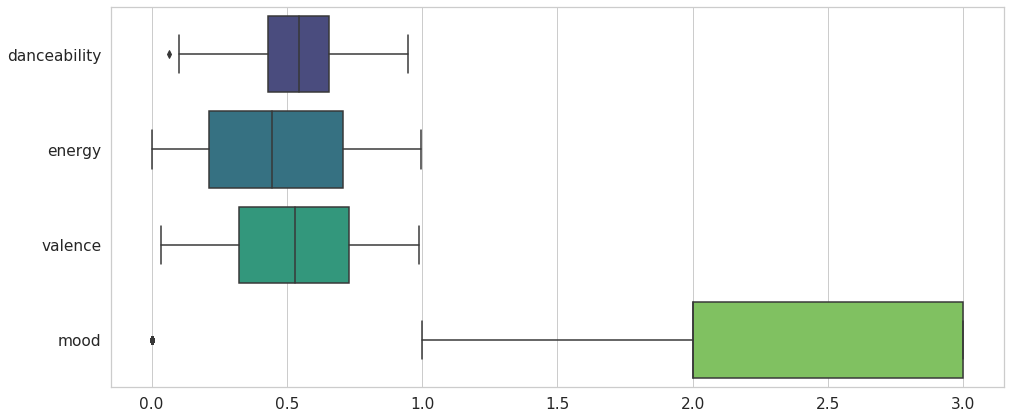

In [469]:
plt.figure(figsize=(16,7))
snb.boxplot(data=df_train.loc[:] , orient="h", palette="viridis")

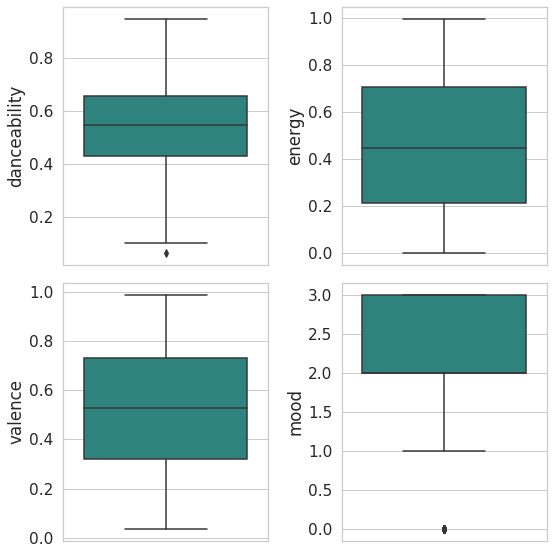

In [470]:
def boxplot_conf(data, columnNumber):
    #data_columns = data.columns.values
    data_columns = data._get_numeric_data().columns.values
    plot_columns = columnNumber
    number_of_columns = math.ceil(len(data_columns)/plot_columns)
    number_of_rows = math.ceil((len(data_columns))/number_of_columns)

    plt.figure(figsize=(8,8))
    for i in range(0,len(data_columns)):
        plt.subplot(number_of_columns, number_of_rows, i+1)
        snb.set_style('whitegrid')
        snb.boxplot(data[data_columns[i]],palette='viridis',orient='v')
        plt.tight_layout()

boxplot_conf(df_train, 3)

## Imbalance problem<a class="anchor" id="imbalance"></a>

However, the next plot shows that two of the moods are severely underrepresented because of undersampling so I've chosen to use Generate synthetic samples: Synthetic Minority Oversampling Technique (SMOTE) to balance them:

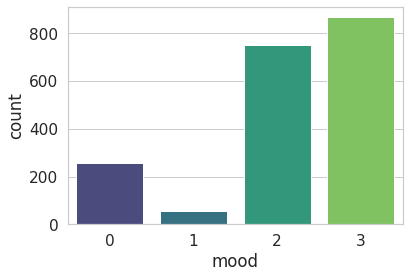

In [471]:
snb.countplot(x = 'mood', data = df_train, palette = 'viridis')

In [434]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [435]:
X_train = pd.DataFrame(data=X_train_sm, columns=X_train.columns)
y_train = pd.DataFrame(data=y_train_sm, columns=['mood'])

In [436]:
wholeDF = pd.concat([X_train, y_train], sort=True)

1.0    698
0.0    698
2.0    698
3.0    698
Name: mood, dtype: int64

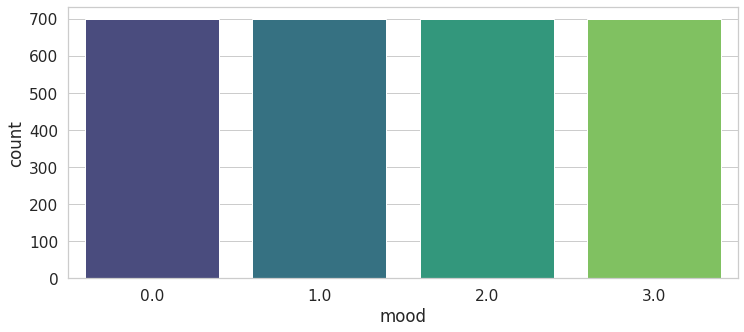

In [437]:
# Let's plot the result of the target variable and see if it's balanced now
data_train = pd.DataFrame(data=wholeDF, columns=wholeDF.columns)
plt.figure(figsize=(12,5))
snb.countplot(x = 'mood', data = wholeDF, palette = 'viridis')
wholeDF.mood.value_counts()

## Training Machine Learning Models<a class="anchor" id="models"></a>

In [211]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier, RandomTreesEmbedding
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, confusion_matrix, roc_curve, auc, classification_report

### Logistic Regression<a class="anchor" id="logistic"></a>

In [472]:
lm = LogisticRegression(solver='lbfgs', max_iter=100)
lm.fit(X_train, y_train.values.ravel())
y_pred_cm = lm.predict(X_test)
y_pred = lm.predict_proba(X_test)
print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))

0.9287103046014258
0.9430051813471503


### Decision trees<a class="anchor" id="decisiontree"></a>

In [473]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth = None, criterion='entropy')
dt = dt.fit(X_train, y_train.values.ravel())
y_pred_dt_cm = dt.predict(X_test)
y_pred_dt = dt.predict_proba(X_test)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

1.0
0.9559585492227979


### Random forest classifier<a class="anchor" id="randomforest"></a>

In [474]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 3, max_depth=5, random_state = 0)
rf.fit(X_train, y_train.values.ravel())
y_pred_rf_cm = rf.predict(X_test)
y_pred_rf = rf.predict_proba(X_test)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9734283862605314
0.9352331606217616


# Evaluating the Model<a class="anchor" id="evaluating"></a>
I'll be evaluating the performance of the models with different metrics and the **confusion matrix** will give us the exact number of accurate predictions or misses.

* **Accuracy:** How often was the classifier correct?
* **Precission:** How often was the classifier correct when it predicts a mood?
* **Recall:** How often was the classifier predicting correctly a mood when the mood was the actual result?
* **F1-score:** What is the harmonic mean of precission and recall?

## Test Data<a class="anchor" id="testdata"></a>

What did the test data actually looked like?

In [452]:
y_test_df = pd.DataFrame(data=y_test, columns=['mood'])
df_t = pd.concat([X_test, y_test_df], sort = True)

3.0    169
2.0    143
0.0     70
1.0      4
Name: mood, dtype: int64

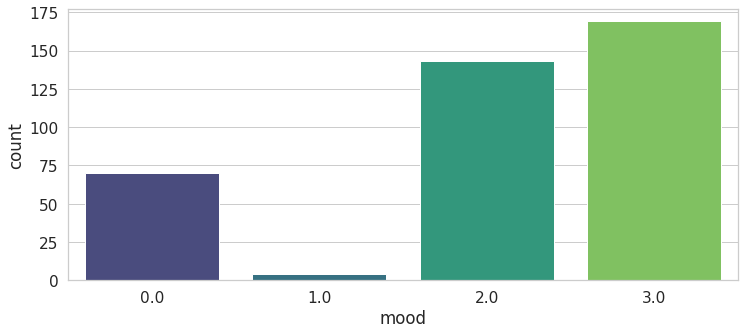

In [451]:
# Plot the result of the target variable
plt.figure(figsize=(12,5))
snb.countplot(x = 'mood', data = df_t, palette = 'viridis')
df_t.mood.value_counts()

## Results<a class="anchor" id="results"></a>

In [453]:
""" 
parameters:
    y_test: dataframe with the real data labels.
    y_pred: dataframe with the predicted data labels.
Returns:
    data_cm: Dataframe of the confusion matrix result.
"""
def confusionMatrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    data_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    data_cm.index.name = 'Actual'
    data_cm.columns.name = 'Predicted'

    snb.set(font_scale=1.4)
    fig, ax = plt.subplots(figsize=(12,6))

    snb.heatmap(data_cm, cmap="Blues", annot=True, fmt='', ax=ax)
    return data_cm

### Logistic Regression-Results<a class="anchor" id="evaluateLog"></a>

What is a confusion matrix? It shows us how many times the model correctly categorized the data and how many times it got it wrong.

Predicted,0,1,2,3
Actual,,,,
0,68,2,0,0
1,0,4,0,0
2,14,1,128,0
3,0,14,1,154


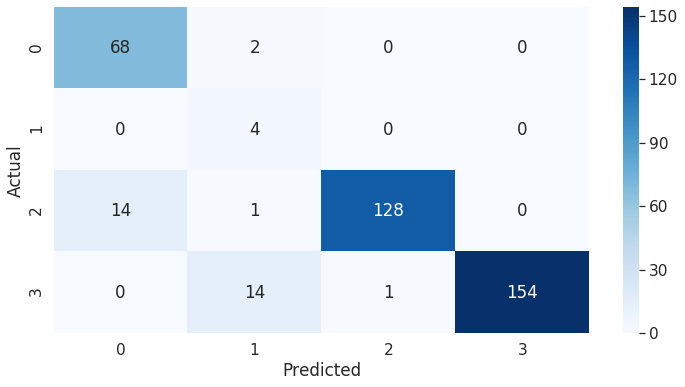

In [454]:
data_cm = confusionMatrix(y_test, y_pred_cm)
data_cm

In the confusion matrix above for example, the model classified correctly a 0 (happy) 68 times and missclassify it 14 times as a 2 (Relaxed).

In [455]:
print(classification_report(y_test, y_pred_cm))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        70
           1       0.19      1.00      0.32         4
           2       0.99      0.90      0.94       143
           3       1.00      0.91      0.95       169

    accuracy                           0.92       386
   macro avg       0.75      0.94      0.78       386
weighted avg       0.96      0.92      0.93       386



### Decision Tree-Results<a class="anchor" id="evaluateTree"></a>

Predicted,0,1,2,3
Actual,,,,
0,65,0,5,0
1,0,4,0,0
2,7,0,136,0
3,0,3,0,166


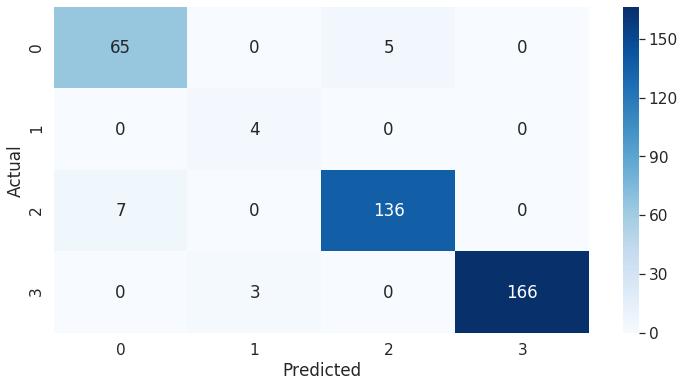

In [456]:
data_cm = confusionMatrix(y_test, y_pred_dt_cm)
data_cm

In [457]:
print(classification_report(y_test, y_pred_dt_cm))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        70
           1       0.57      1.00      0.73         4
           2       0.96      0.95      0.96       143
           3       1.00      0.98      0.99       169

    accuracy                           0.96       386
   macro avg       0.86      0.97      0.90       386
weighted avg       0.96      0.96      0.96       386



### Random Forest-Results<a class="anchor" id="evaluateRando"></a>

Predicted,0,1,2,3
Actual,,,,
0,61,0,9,0
1,0,4,0,0
2,16,0,127,0
3,0,9,0,160


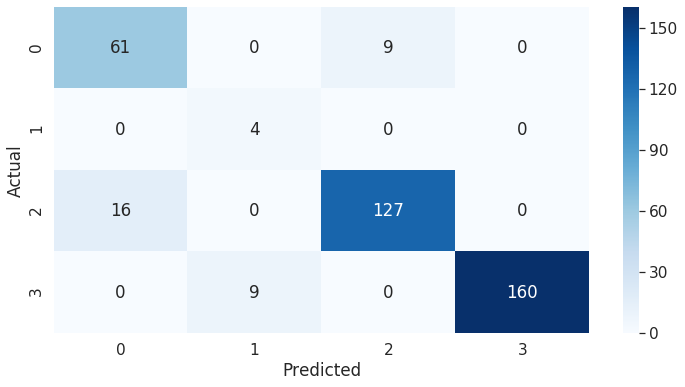

In [336]:
data_cm = confusionMatrix(y_test, y_pred_rf_cm)
data_cm

In [313]:
print(classification_report(y_test, y_pred_rf_cm))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        70
           1       0.31      1.00      0.47         4
           2       0.93      0.89      0.91       143
           3       1.00      0.95      0.97       169

    accuracy                           0.91       386
   macro avg       0.76      0.93      0.80       386
weighted avg       0.93      0.91      0.92       386



# Testing dataset (my Song features)<a class="anchor" id="prediction"></a>
Finally, I'm going to use my own song dataset on the model created with Decision Tree which seemed to have the best overall evaluation.

In [345]:
df_test = pd.read_csv('mySongsFeatFeaturesFinal.csv')
df_test = df_test.loc[:, ~df_test.columns.isin(['FeaturesMood','Artist','Title','LyricsMood', 'id','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','tempo'])]

In [346]:
y_pred_dt_cm = dt.predict(df_test)
y_pred_dt = dt.predict_proba(df_test)

In [359]:
moods = []
moodText = []
for x in np.nditer(y_pred_dt_cm):
    moods.append(x)
    if(x == 0):
        moodText.append("Happy")
    elif (x == 1):
        moodText.append("Angry")
    elif (x == 2):
        moodText.append("Relaxed")
    else:
        moodText.append("Sad")

df_test['moods'] = moods
df_test['FeaturesMood']= moodText

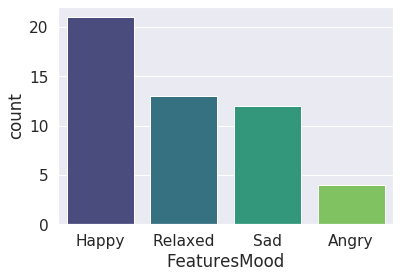

In [365]:
snb.countplot(x = 'FeaturesMood', data = df_test, palette = 'viridis')